## Accuracy(정확도)

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass 
    
    def predict(self, X):
        pred = np.zeros(( X.shape[0], 1 ))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

# NULL 처리 함수 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def encode_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df 

# 앞에서 설정한 Data Preprocessing 함수 호출 
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('./titanic_train.csv')
Y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1, inplace=False)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_df, Y_titanic_df, test_size=0.2, random_state=11)

myclf = MyDummyClassifier()
myclf.fit(X_train, Y_train)
mypredictions = myclf.predict(X_test)
print(f"더미 클래스파이어의 정확도는 {accuracy_score(Y_test, mypredictions):.4f}")

더미 클래스파이어의 정확도는 0.8324


In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, Y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

digits = load_digits()
print(digits.data)
print(f"\n### digits.data.shape: {digits.data.shape}\n")
print(digits.target)
print(f"\n### digits.target.shape: {digits.target.shape}\n")

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

### digits.data.shape: (1797, 64)

[0 1 2 ... 8 9 8]

### digits.target.shape: (1797,)



In [7]:
y = (digits.target == 7).astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, y, random_state=11)

In [8]:
# 불균형한 레이블 데이터 분포도 확인
print(f"레이블 테스트 세트 크기: {Y_test.shape}")
print(f"레이블 테스트 0과 1의 분포도\n")
print(pd.Series(Y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, Y_train)
fakepred = fakeclf.predict(X_test)
print(f"\n모든 예측을 0으로 하여도 정확도는: {accuracy_score(Y_test, fakepred)}")

레이블 테스트 세트 크기: (450,)
레이블 테스트 0과 1의 분포도

0    405
1     45
dtype: int64

모든 예측을 0으로 하여도 정확도는: 0.9


## 정밀도(Precision) 와 재현율(Recall)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [10]:
print(f"정밀도: {precision_score(Y_test, fakepred)}")
print(f"재현율: {recall_score(Y_test, fakepred)}")

정밀도: 0.0
재현율: 0.0


C:\Users\financeRyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [11]:
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f} 재현율: {recall:.4f}")
    

In [12]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./titanic_train.csv')
Y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1, inplace=False)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_df, Y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, Y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(Y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246 재현율: 0.7705


## 업무에 따른 재현율과 정밀도의 상대적 중요도

* 재현율이 상대적으로 더 중요한 지표인 경우는, 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 : 암 진단, 금융사기 판별 

* 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 : 스팸메일 

## 정밀도/재현율 트레이드 오프

* 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야할 경우 분류의 결정 임곗값을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다

* 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을강제로 높이면 다른 하나의 수치는 떨어지기 쉽습니다이를 정밀도/재현율의 트레이드오프라고 부릅니다

**분류 결정 임곘값이 낮아질 수록 Positive로 예측할 확률이 높아짐. 재현율 증가**

### predict_proba() 메소드 확인

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f"pred_proba() 결과 shape: {pred_proba.shape}")
print(f"pred_proba array에서 앞 3개만 샘플로 추출 \n: {pred_proba[:3]}")

# 예측확률과 예측결과를 합쳐서 한눈에
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print(f"두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n", pred_proba_result[:3])

pred_proba() 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


### 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환

In [14]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값, 분류 결정 임곘값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binzrizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(Y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246 재현율: 0.7705


In [15]:
#Binarizer의 threshold 설정값, 분류 결정 임곘값임.
custom_threshold = 0.4

# predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binzrizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(Y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042 재현율: 0.8197


In [16]:
# 테스트를 수행할 모든 임곘값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(Y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f"임곗값: {custom_threshold}")
        get_clf_eval(Y_test, custom_predict)
        print()

get_eval_by_threshold(Y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042 재현율: 0.8197

임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869 재현율: 0.7869

임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246 재현율: 0.7705

임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654 재현율: 0.7377

임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980 재현율: 0.7213



### precision_recall_curve() 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출 

In [17]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print('thresholds 5 sample:', thresholds[:5])
print('precisions 5 sample:', precisions[:5])
print('recalls 5 sample:', recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
반환된 precisions 배열의 Shape: (148,)
반환된 recalls 배열의 Shape: (148,)
thresholds 5 sample: [0.11573101 0.11636721 0.11819211 0.12102773 0.12349478]
precisions 5 sample: [0.37888199 0.375      0.37735849 0.37974684 0.38216561]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.98360656]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


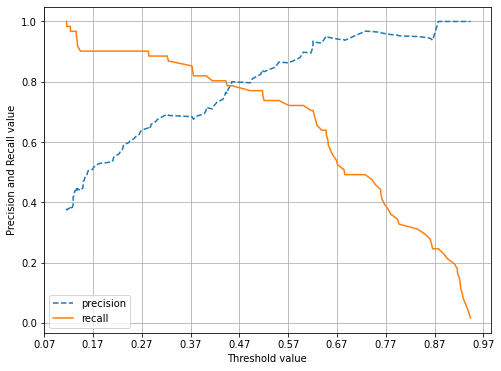

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( Y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( Y_test, lr_clf.predict_proba(X_test)[:, 1] )

## F1 Score와 ROC-AUC의 이해

In [21]:
## F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, pred)

print(f"F1 스코어: {f1:.4f}")

F1 스코어: 0.7966


In [22]:
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(Y_test, pred)
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f} 재현율: {recall:.4f} F1: {f1:.4f}")

In [24]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(Y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042 재현율: 0.8197 F1: 0.7576

임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869 재현율: 0.7869 F1: 0.7869

임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246 재현율: 0.7705 F1: 0.7966

임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654 재현율: 0.7377 F1: 0.7965

임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980 재현율: 0.7213 F1: 0.8000



In [31]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 5step 기준으로
# thresholds[0]은 max(예측확률) + 1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print(f"샘플 추출을 위한 임곗값 배열의 index: ", thr_index)
print(f"샘플 index로 추출한 임곗값: ", np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR값
print(f"샘플 임곗값별 FPR: ", np.round(fprs[thr_index], 3))
print(f"샘플 임곗값별 TPR: ", np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index:  [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


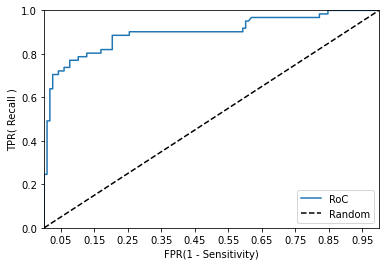

In [33]:
def roc_curve_plot(Y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR값을 반환 받음
    fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_class1)
    
    # ROC Curve를 plot으로 그림 
    plt.plot(fprs, tprs, label='RoC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X축의 scale을 0, 1eksdnlfh qusrud, X, Y 축명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(Y_test, lr_clf.predict_proba(X_test)[:, 1])

In [34]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, -1]
roc_score = roc_auc_score(Y_test, pred_proba)
print(f"ROC AUC값: {roc_score}")

ROC AUC값: 0.8986524034454015


In [38]:
def get_clf_eval(Y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(Y_test, pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(Y_test, pred_proba)
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f} 재현율: {recall:.4f} F1: {f1:.4f} AUC: {roc_auc:.4f}")

In [39]:
get_clf_eval(Y_test, pred, pred_proba)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246 재현율: 0.7705 F1: 0.7966 AUC: 0.8987
